# Tutorial 2 - NLP With Manual Features

## Question 1 - Data Loading
Implement the method ```load_raw_dataset(split)``` that loads the raw dataset split in ```./data/{split}.txt```.
The function should return two arguments:
1. sentences - A list of sentences, all in lowercase.
2. y - A list of all the labels.

Time: ~10 minutes

example.txt:
>  This is a happy text,positive
   This is a sad text,negative
   This too is a happy text,positive

<code>
sentences, y = load_raw_data("example")

print(sentences)

print(y)

\>\> ['this is a happy text', 'this is a sad text', 'this too is a happy text']
\>\> ['positive', 'negative', 'positive']
</code>



In [224]:
def load_raw_dataset(split):
    with open(f"./data/{split}.txt") as f:
        raw_data = [line.lower().strip() for line in f.readlines()]
        raw_data = [line.split("\t") for line in raw_data]
        sentences = [line[0] for line in raw_data]
        y = [line[1] for line in raw_data]
    return sentences, y

In [225]:
sentences, y = load_raw_dataset("example")
print(sentences)
print(y)

['this is a happy text', 'this is a sad text', 'this too is a happy text']
['positive', 'negative', 'positive']


# Question 2 - Feature maps

In this question you will implement feature maps as lambda functions:
```feature_map = lambda sentence: some_condition```

Implement the following features:
1. Return whether the word "happy" is in the sentence.
2. Return whether the 4'th word in the sentence is "happy".
3. Return whether the sentence contains 20 or more characters.
4. Return whether the sentence contains 6 or more words.
5. Implement a method called ```convert_raw_to_features(sentences, feature_maps)``` that given a list of sentences in the form of Q1 and a list of feature maps, sequentially applies the feature maps to convert the sentences to a feature representation.

In [151]:
example_sentence = 'This is a happy text'
i = 0

# Section 1
feature_1 = lambda sentence: "happy" in sentence
print(f"Has happy: {feature_1(example_sentence)}")
# Section 2
feature_2 = lambda sentence: sentence.split(" ")[3] == "happy"
print(f"Is 4'th happy: {feature_2(example_sentence)}")
# Section 3
feature_3 = lambda sentence: len(sentence) >= 20
print(f"20 or more characters: {feature_3(example_sentence)}")
# Section 4
feature_4 = lambda sentence: len(sentence.split(" ")) >= 6
print(f"6 or more words: {feature_4(example_sentence)}")

Has happy: True
Is 4'th happy: True
20 or more characters: True
6 or more words: False


In [152]:
def convert_raw_to_features(sentences, feature_maps):
    feature_representations = []
    for sentence in sentences:
        feature_representations.append([feature(sentence) for feature in feature_maps])
    return feature_representations

In [153]:
feature_maps = [feature_1, feature_2, feature_3, feature_4]
X = convert_raw_to_features(sentences, feature_maps)
print(X)

[[True, True, True, False], [False, False, False, False], [True, False, True, True]]


# Question 3 - Training a Model
Implement the following steps:
1. Load the train and eval sets
2. Define some set of features
3. Convert the raw dataset to a feature representation
4. Fit a SVM model to the train set
5. Measure your performance on the eval set
6. Display a confusion matrix on the eval set

In [154]:
# 1
train_sentences, train_y = load_raw_dataset('train')
eval_sentences, eval_y = load_raw_dataset('eval')

In [220]:
# 2
positive_words = ["like", "good", "great", "right", "enough", "better", "important", "best", "free", "available", "love", "clear", "top", "strong", "modern", "peace", "support", "fine", "ready", "led", "hot", "effective", "lead", "clearly", "freedom", "beautiful", "respect", "easy", "progress", "faith", "pretty", "happy", "popular", "proper", "successful", "success", "famous", "regard", "greatest", "bright", "patient", "significant", "variety", "interests", "fresh", "interesting", "providence", "fair", "fast", "favor", "solid", "nice", "quiet", "gain", "positive", "rich", "advantage", "master", "sharp", "beauty", "unity", "clean", "sweet", "appropriate", "excellent", "leading", "protection", "adequate", "capable", "helped", "honor", "relief", "achievement", "reasonable", "spiritual", "appeal", "benefit", "powerful", "sufficient", "cool", "pleasure", "friendly", "ideal", "soft", "victory", "sensitive", "fairly", "liked", "perfect", "safe", "smile", "useful", "enjoyed", "confidence", "loved", "pure", "improved", "properly", "supported", "advanced", "correct", "gold", "hero", "trust", "approval", "easier", "supreme", "brilliant", "proud", "creative", "holy", "impressive", "silent", "grand", "intelligence", "precisely", "honest", "humor", "luck", "remarkable", "award", "encourage", "liberty", "recommended", "superior", "promise", "promised", "valuable", "accomplished", "enjoy", "fun", "helping", "lovely", "comfort", "heaven", "rapid", "readily", "distinguished", "ease", "golden", "hardy", "pride", "skill", "smooth", "sufficiently", "distinction", "favorite", "pleased", "steady", "afford", "grace", "guidance", "handsome", "improvement", "joy", "prominent", "talent", "attractive", "gained", "improve", "maturity", "satisfactory", "striking", "glad", "pleasant", "assure", "comfortable", "contribution", "effectively", "magic", "outstanding", "stronger", "classic", "desirable", "satisfied", "smiling", "thank", "tough", "accurate", "calm", "dignity", "divine", "genuine", "logical", "openly", "protect", "realistic", "reasonably", "suitable", "benefits", "favorable", "harmony", "healthy", "leads", "precise", "succeeded", "swift", "courage", "effectiveness", "efficient", "excitement", "romantic", "survival", "competitive", "defeat", "extraordinary", "mature", "perfectly", "poetic", "successfully", "impressed", "reform", "secure", "skilled", "stable", "delight", "ethical", "exciting", "helpful", "merit", "mighty", "modest", "morality", "precious", "prestige", "recovery", "advantages", "clarity", "consistent", "cure", "dawn", "diplomatic", "enthusiasm", "optimal", "passion", "prize", "promptly", "talents", "delicate", "eager", "gentle", "magnificent", "prefer", "profound", "reputation", "supporting", "appreciate", "charm", "delightful", "intelligent", "lively", "peaceful", "premier", "sophisticated", "continuity", "flexible", "fortune", "generous", "grateful", "productive", "rational", "recommend", "accomplish", "accurately", "brave", "charming", "enthusiastic", "honored", "masters", "meaningful", "promising", "qualified", "recommendation", "champion", "cleared", "dedicated", "encouraging", "excited", "genius", "happiness", "incredible", "noble", "savings", "balanced", "convenient", "destiny", "economical", "fortunate", "loyalty", "patience", "recommendations", "refund", "reliable", "spectacular", "successes", "triumph", "colorful", "complement", "dynamic", "educated", "enjoyment", "fans", "glory", "heroic", "intimate", "lucky", "luxury", "neat", "respectable", "revolutionary", "smart", "amazing", "authentic", "cooperative", "decent", "distinctive", "dominated", "fantastic", "fascinating", "fortunately", "happily", "improvements", "lean", "mercy", "orderly", "promises", "renaissance", "splendid", "strongest", "achievements", "assurance", "comprehensive", "consistently", "convenience", "decisive", "exceed", "exceptional", "gains", "instantly", "likes", "lover", "loves", "neatly", "affection", "angel", "beloved", "earnest", "fame", "faster", "favored", "humble", "loyal", "privilege", "remarkably", "selective", "simpler", "awarded", "awards", "clever", "darling", "enjoying", "formidable", "praise", "progressive", "renewed", "spontaneous", "ambitious", "ample", "beautifully", "cherished", "compatible", "confident", "delighted", "fancy", "finest", "flexibility", "glorious", "glow", "goodness", "humorous", "improving", "miracle", "notably", "proves", "saint", "satisfy", "sturdy", "advocate", "attraction", "boost", "celebration", "clearer", "constructive", "defeated", "excellence", "feasible", "gaining", "loving", "optimism", "optimistic", "qualify", "reward", "sincere", "succeed", "supports", "amusing", "appealing", "approve", "breeze", "capability", "celebrated", "elegant", "encouragement", "entertain", "immense", "influential", "polished", "preferably", "prosperity", "protective", "reforms", "relaxed", "restored", "revelation", "sensation", "sensible", "superb", "superiority", "thoughtfully", "commitment", "correctly", "doubtless", "eagerly", "earnestly", "elite", "fond", "gifted", "grin", "handy", "imaginative", "integral", "portable", "remedy", "safely", "satisfying", "sincerity", "solidarity", "stability", "sweeping", "transparent", "understandable", "unlimited", "affirm", "ardent", "aspirations", "bloom", "comfortably", "compact", "daring", "durable", "entertaining", "faithful", "fashionable", "foremost", "freed", "fulfillment", "honorable", "hopeful", "lighter", "luminous", "magical", "paradise", "passionate", "poised", "quaint", "smoothly", "agreeable", "amazed", "appreciated", "beneficial", "cheaper", "cohesive", "convincing", "eloquent", "energetic", "equitable", "greatness", "happier", "improves", "instrumental", "integrated", "intelligible", "keen", "liking", "marvelous", "memorable", "obtainable", "perfection", "prompt", "proven", "recover", "satisfactorily", "smiles", "tender", "thoughtful", "trusted", "unquestionably", "accomplishments", "admirable", "admiration", "admire", "amazement", "assuring", "blessing", "cheerful", "conscientious", "decency", "elegance", "enjoys", "exceeds", "glowing", "graceful", "hail", "honesty", "ideally", "indebted", "ingenious", "intricate", "majestic", "masterpiece", "mastery", "non-violent", "patriot", "patriotic", "pleasantly", "pleasing", "privileged", "sensations", "serene", "simplest", "tops", "tougher", "tremendously", "bless", "brilliantly", "carefree", "cleaner", "dazzling", "eminent", "enchanting", "gracious", "gratitude", "guarantee", "heartily", "heavenly", "inspiration", "motivated", "nicely", "paramount", "patiently", "picturesque", "positively", "scenic", "simplified", "simplify", "skillful", "spacious", "stimulating", "superbly", "sweetheart", "timely", "articulate", "astonishing", "authoritative", "boom", "brighter", "cheer", "comforting", "crisp", "dependable", "dominate", "eased", "efficiently", "engaging", "everlasting", "exceedingly", "exceptionally", "fidelity", "gaiety", "generously", "gracefully", "honoring", "impartial", "impassioned", "inspiring", "irresistible", "kindly", "merry", "miracles", "momentous", "pardon", "profoundly", "prosperous", "radiant", "reassurance", "relish", "revival", "revive", "rosy", "sane", "spirited", "straightforward", "strikingly", "stunned", "succeeds", "super", "triumphantly", "trophy", "usable", "accomplishment", "bargain", "beckoned", "blossom", "brisk", "chic", "commend", "congenial", "congratulations", "conveniently", "dignified", "diversified", "dominates", "easiest", "envy", "exalted", "excitedly", "exuberant", "fastest", "fearless", "fiery", "fruitful", "generosity", "gorgeous", "idol", "incredibly", "innovation", "intuitive", "lyrical", "magnificently", "noteworthy", "plentiful", "polite", "reputable", "self-determination", "sincerely", "slick", "splendor", "straighten", "supportive", "talented", "trumpet", "uphold", "admirably", "affectionate", "astonished", "astonishingly", "breakthrough", "clear-cut", "courteous", "ecstasy", "endorse", "exceeding", "fabulous", "fairness", "fascination", "feat", "firmer", "first-class", "glistening", "grandeur", "impeccable", "inexpensive", "legendary", "low-cost", "luxurious", "marvel", "meticulously", "originality", "poignant", "poise", "preferable", "prudence", "quicker", "refined", "refreshing", "righteousness", "savior", "sensational", "serenity", "solace", "speedy", "stimulate", "stunning", "succeeding", "sweetly", "thankful", "thinner", "unreal", "upheld", "vibrant", "accessible", "advantageous", "adventurous", "affinity", "applaud", "appreciable", "astonishment", "astounding", "attentive", "awe", "awed", "charitable", "cherish", "coherent", "commendable", "compassion", "cute", "deference", "delicacy", "desiring", "enchanted", "enhance", "enhanced", "enrich", "enterprising", "enthusiastically", "exceeded", "excellently", "facilitate", "faithfully", "famed", "fertile", "fervent", "fine-looking", "flourish", "fluent", "foresight", "gaily", "gallant", "genial", "glamorous", "glitter", "harmless", "harmonious", "heroine", "humane", "humility", "illuminating", "immaculate", "individualized", "indulgence", "ingenuity", "invaluable", "joyous", "justly", "kindness", "liberation", "lush", "monumental", "novelty", "obsession", "overture", "peacefully", "politeness", "prefers", "priceless", "proficient", "prominence", "proving", "refinement", "refreshed", "reverence", "richer", "richly", "richness", "righteous", "salutary", "seasoned", "securely", "shine", "skillfully", "softer", "sparkling", "suffice", "supremacy", "tenacity", "terrific", "thrift", "thrill", "triumphant", "truthfully", "unequivocally", "acclaim", "acclaimed", "admiring", "advocated", "affirmation", "affirmative", "affluence", "amply", "assuredly", "audible", "awesome", "backbone", "benefactor", "benevolence", "bliss", "blissful", "bravery", "brightest", "brilliance", "celebrate", "cleverly", "complementary", "congratulate", "considerate", "coolest", "courageous", "cure-all", "dashing", "delicious", "delightfully", "devout", "ecstatic", "eminence", "endorsed", "engrossing", "enviable", "evenly", "felicity", "fervor", "finely", "first-rate", "fondly", "fondness", "friendliness", "gem", "gladly", "glisten", "gratification", "gratified", "heartening", "hospitable", "hottest", "idyllic", "impress", "intrigue", "jolly", "lavishly", "liberate", "loveliness", "lucid", "mercifully", "miraculous", "modesty", "peerless", "piety", "powerfully", "prodigious", "quieter", "rapport", "reasoned", "reconcile", "redemption", "rejoicing", "resolute", "respectful", "responsive", "rewarding", "rightful", "rightly", "self-respect", "self-satisfaction", "sensibly", "smartly", "sparkle", "splendidly", "stately", "streamlined", "striving", "subsidize", "subsidized", "sumptuous", "supremely", "tantalizing", "tenderly", "thrilling", "thriving", "tranquility", "treasure", "trusting", "unconditional", "unfettered", "veritable", "versatility", "vigilance", "admirer", "adorable", "agility", "amaze", "amazingly", "amenable", "amuse", "ardor", "aspiration", "aspire", "assurances", "beckons", "bolster", "breathtaking", "cheery", "compliment", "consummate", "cornerstone", "courageously", "covenant", "defeating", "defender", "diligence", "divinely", "eagerness", "earnestness", "easing", "ebullient", "elated", "endearing", "enrichment", "entranced", "erudite", "excite", "exquisite", "exquisitely", "extraordinarily", "exultation", "fascinate", "flashy", "fortitude", "fragrant", "freedoms", "gladden", "glee", "glimmer", "god-given", "graciously", "gratefully", "gratifying", "hallmark", "healthful", "high-spirited", "hug", "illustrious", "industrious", "infallible", "inspire", "instructive", "intimacy", "intriguing", "inventive", "inviolate", "keenly", "lavish", "lucrative", "merriment", "miraculously", "non-violence", "outdo", "overtake", "painless", "passionately", "peaceable", "peach", "personages", "personalized", "playful", "plush", "prodigy", "prosper", "purposeful", "radiance", "rapture", "refine", "reformed", "resourceful", "restful", "revel", "reverent", "revolutionized", "rightfully", "salute", "satisfies"]

In [221]:
negative_words = ["problem", "death", "miss", "problems", "hard", "dark", "dead", "lost", "cold", "difficult", "issue", "fall", "bad", "concerned", "trouble", "fear", "slowly", "doubt", "poor", "lack", "stress", "limited", "attack", "concern", "hell", "fell", "complex", "failure", "break", "enemy", "pain", "died", "loss", "impossible", "strange", "crisis", "difficulty", "knife", "killed", "murder", "failed", "die", "broke", "evil", "danger", "dust", "gross", "issues", "hung", "object", "broken", "kill", "unusual", "struggle", "fat", "refused", "slow", "lie", "struck", "tension", "critical", "lose", "pale", "afraid", "spite", "risk", "unable", "absence", "bitter", "loose", "negative", "sin", "conflict", "sick", "strike", "burning", "tragedy", "anger", "cry", "destroy", "limit", "resistance", "sorry", "tired", "blind", "denied", "deny", "fears", "unknown", "dangerous", "difficulties", "fiction", "losses", "opposition", "angry", "interference", "terrible", "burden", "confused", "confusion", "errors", "expensive", "lies", "odd", "slaves", "suffering", "warning", "concerns", "darkness", "dirt", "anxiety", "hate", "prison", "suffered", "threat", "funny", "limits", "rough", "smoke", "vice", "burned", "criticism", "intense", "missed", "stranger", "emergency", "mad", "mystery", "severe", "destruction", "inevitably", "primitive", "sharply", "drunk", "fail", "fool", "hurt", "illusion", "noise", "plot", "bomb", "dirty", "error", "lying", "crime", "isolated", "myth", "sad", "waste", "badly", "bent", "blame", "crazy", "dispute", "dying", "fallen", "mistake", "smell", "blow", "damage", "falling", "guilt", "inevitable", "rejected", "strictly", "suffer", "tragic", "unfortunately", "violent", "crowded", "curt", "damn", "falls", "inadequate", "lacking", "weak", "conservative", "decline", "fallout", "shock", "strain", "troubled", "complicated", "excessive", "propaganda", "radical", "slave", "split", "suspect", "anxious", "false", "guilty", "cloud", "excuse", "hated", "limitations", "losing", "peculiar", "dull", "enemies", "frozen", "injury", "suspicion", "utterly", "controversy", "critics", "desperate", "disaster", "disturbed", "hang", "marginal", "mysterious", "threatening", "unhappy", "breaking", "cancer", "critic", "delayed", "destructive", "devil", "dilemma", "faint", "fist", "harm", "lonely", "painful", "terror", "vague", "bore", "cheap", "criminal", "depression", "nervous", "rigid", "scarcely", "stupid", "subjected", "burns", "discrimination", "killing", "protest", "sink", "stern", "stuck", "unexpected", "alienation", "ambiguous", "arbitrary", "attacks", "backward", "bother", "complained", "conspiracy", "desperately", "doubtful", "fault", "joke", "mess", "panic", "savage", "surrender", "troubles", "uncertain", "uneasy", "unfortunate", "warned", "crack", "delay", "desert", "despair", "helpless", "killer", "partisan", "scared", "shame", "stiff", "stumbled", "ugly", "unlikely", "urgent", "crash", "hatred", "illness", "loud", "overwhelming", "poverty", "quarrel", "reactionary", "struggling", "trap", "condemned", "damned", "deadly", "dim", "fatal", "fever", "fury", "hostile", "ignore", "lacked", "letch", "murderer", "naive", "puzzled", "ridiculous", "shocked", "smelled", "sober", "startling", "stresses", "twisted", "abrupt", "abruptly", "abuse", "bitterness", "bunk", "denial", "dick", "drain", "lemon", "madden", "neglected", "objection", "resentment", "stall", "stolen", "sue", "tanks", "terribly", "twist", "absurd", "aggressive", "awful", "chaos", "confession", "cracked", "defensive", "explosive", "failing", "friction", "imaginary", "inability", "indifference", "mistaken", "obscure", "shake", "slowed", "suicide", "useless", "vicious", "violation", "alarm", "ashamed", "bitterly", "bleeding", "confined", "confrontation", "costly", "disastrous", "disturbing", "doubts", "dusty", "foolish", "ignorance", "injustice", "isolation", "mistakes", "pan", "rage", "rail", "refuse", "ruined", "shortage", "toll", "unnecessary", "wasted", "assault", "burn", "commonplace", "contempt", "crude", "cruel", "disappointed", "disappointment", "disapproval", "distress", "drag", "dragged", "dragging", "exhausted", "forbidden", "freezing", "hastily", "horrible", "knock", "loses", "meaningless", "misery", "opponent", "oppose", "pains", "refusal", "reluctant", "restricted", "silly", "tense", "tentative", "trick", "unpleasant", "bastards", "bored", "bothered", "chill", "complaint", "corruption", "criticized", "decay", "deviation", "dislike", "fails", "frightening", "gloom", "grim", "hopeless", "impersonal", "irrelevant", "mist", "odor", "painfully", "penalty", "pity", "retreat", "ruin", "screwed", "shallow", "symptoms", "threats", "uncomfortable", "upset", "vulnerable", "breakdown", "brutality", "contradiction", "cruelty", "debt", "defects", "dumb", "fearful", "fictional", "gossip", "handicapped", "idle", "incomplete", "insane", "ironic", "miserable", "monstrous", "nonsense", "objections", "protested", "radically", "restless", "scream", "sinister", "static", "steep", "suspicious", "tumbled", "undue", "virus", "bastard", "boil", "breaks", "challenging", "controversial", "crashed", "deaf", "debts", "dies", "furiously", "hardened", "harsh", "hazard", "hollow", "ignorant", "irony", "limp", "louder", "lousy", "neglect", "ominous", "phony", "rival", "sadly", "solemn", "stereotype", "stubborn", "swollen", "tank", "temper", "temptation", "turmoil", "violently", "adverse", "ambiguity", "apprehension", "awkward", "beg", "boredom", "catastrophe", "childish", "chronic", "complain", "conceded", "confess", "crept", "criticisms", "curse", "cursed", "deficiency", "depressed", "disagreement", "disliked", "distorted", "drastic", "eccentric", "embarrassing", "epidemic", "fatigue", "frantic", "frighten", "frustration", "ghetto", "hideous", "incapable", "indifferent", "lengthy", "misunderstanding", "needless", "paradoxically", "passive", "plea", "poorly", "prejudice", "protests", "regretted", "rejection", "rejects", "restrict", "strained", "strenuous", "strict", "swelling", "threaten", "trivial", "tyranny", "unexpectedly", "unusually", "accuse", "aggression", "awfully", "begging", "bleak", "coarse", "compulsive", "creep", "crushed", "deadlock", "deficiencies", "denying", "disabled", "disturb", "disturbance", "doomed", "drastically", "dreadful", "fake", "fleeing", "fragile", "frustrated", "grief", "hysterical", "impatience", "impatient", "implication", "indignant", "limitation", "longing", "miscellaneous", "misfortune", "misleading", "muddy", "neurotic", "obstacle", "poison", "refusing", "reject", "revulsion", "rocky", "rust", "scar", "scars", "slaughter", "slug", "sore", "spade", "stains", "stole", "undesirable", "unfamiliar", "vain", "vengeance", "vent", "accidental", "agony", "annoyance", "antagonism", "anxiously", "appalling", "battered", "blunt", "boiling", "brood", "bulky", "cave", "choke", "conflicts", "contention", "cynical", "declining", "demon", "dense", "disadvantages", "discourage", "dissatisfaction", "dread", "dumped", "elimination", "evils", "exploit", "grotesque", "hardship", "haste", "illegal", "impatiently", "impose", "indignation", "indulge", "interfere", "irregular", "irresponsible", "lazy", "loneliness", "malaise", "melancholy", "menace", "nagging", "nightmare", "oddly", "picket", "puzzling", "quack", "questionable", "ragged", "reckless", "regret", "resigned", "scrambled", "scratch", "skinny", "slack", "slower", "smells", "sorrow", "sticky", "sullen", "taxing", "tortured", "unhappily", "unimportant", "unsuccessful", "untouched", "absurdity", "accusing", "alarmed", "anguish", "bias", "bloody", "boycott", "bruises", "bugs", "butcher", "careless", "coldly", "complaints", "compulsion", "concede", "conflicting", "confront", "conspicuously", "corrupt", "coward", "creeping", "deprived", "deterrent", "discontent", "dismal", "distaste", "embarrassment", "exaggerate", "fabrication", "faulty", "feeble", "fierce", "flair", "foe", "forceful", "frail", "frantically", "fraud", "furious", "greasy", "haunting", "illiterate", "inescapable", "infection", "inhibit", "interruption", "invisible", "irrational", "isolate", "junk", "kills", "lone", "mock", "monotonous", "notorious", "offensive", "pathetic", "peculiarly", "peril", "perilous", "petty", "pig", "precarious", "pretend", "repel", "resent", "restriction", "retreated", "revolt", "rot", "ruins", "rumor", "rusty", "sack", "scandal", "scrap", "selfish", "seriousness", "slump", "spoilage", "stormy", "strangely", "struggled", "stupidity", "subdued", "superstition", "tangle", "taut", "undermine", "unnatural", "unsatisfactory", "unstable", "abuses", "ambush", "anarchy", "angrily", "annoyed", "barren", "beset", "bizarre", "bravado", "bruised", "brutal", "bum", "bust", "callous", "chatter", "chore", "collapse", "concessions", "condemnation", "cracks", "crashing", "crushing", "damaged", "darkened", "defective", "defiance", "defy", "delinquency", "desperation", "despise", "dictator", "disagree", "disappointing", "discomfort", "discontinued", "disobedience", "disorder", "displeased", "distortion", "distressing", "drained", "dripping", "drunken", "dubious", "exclusion", "exhaust", "fatty", "faults", "filthy", "fleeting", "futility", "fuzzy", "gall", "garbage", "gaudy", "glare", "gravely", "grudge", "grumble", "haze", "hopelessly", "hypocrisy", "hysteria", "illusions", "immature", "impaired", "imposing", "inactive", "inefficient", "inexperienced", "inferior", "infringement", "inhuman", "insufficient", "insult", "invalid", "irritation", "liability", "lure", "manipulation", "monotony", "motionless", "narrower", "obscured", "outraged", "overwhelmingly", "persecution", "plight", "prisoner", "protesting", "provocative", "recession", "regression", "reluctantly", "resignation", "restrictive", "retarded", "revenge", "ruthless", "scandals", "scratched", "shrill", "skeptical", "smug", "sporadic", "stark", "starvation", "straining", "superficial", "suppression", "suspicions", "trapped", "troublesome", "ugliness", "unavailable", "unwilling", "vanity", "violate", "vulgar", "wary", "wasteful", "weaken", "aching", "alienated", "ambivalent", "annihilation", "annoying", "assassin", "ax", "betrayal", "bewildered", "bitch", "biting", "blurred", "bothering", "breach", "brute", "buggy", "buzzing", "cliche", "clumsy", "commotion", "congestion", "conspicuous", "contemptuous", "contend", "crippled", "crippling", "declines", "delinquent", "denies", "desolate", "devoid", "disbelief", "disgusted", "disregard", "dissatisfied", "distrust", "divergent", "downhill", "dreary", "dripped", "erosion", "explode", "flares", "freeze", "frenzy", "fried", "frightful", "frost", "futile", "ghastly", "grudgingly", "harassed", "headaches", "hostility", "humiliation", "humming", "imprisonment", "inaction", "indecent", "inhibition", "insolence", "ironically", "jam", "lacks", "lapse", "liable", "lied", "maladjustment", "manipulate", "meager", "misunderstood", "monster", "needy", "noises", "noisy", "offenses", "oppression", "outbursts", "pessimism", "pessimistic", "pigs", "pinch", "plague", "pretense", "pretentious", "pry", "puny", "puppet", "queer", "refuses", "repression", "rip", "ripped", "rivalry", "rude", "rue", "rumors", "runaway", "sadness", "savages", "scarce", "scratches", "senseless", "sickness"]

In [283]:
lambda_generator = lambda word: lambda sentence: word in sentence

feature_maps = []
for word in positive_words + negative_words:
    feature_maps.append(lambda_generator(word))

In [284]:
# 3
train_X = convert_raw_to_features(train_sentences, feature_maps)
eval_X = convert_raw_to_features(eval_sentences, feature_maps)

In [285]:
# 4
from sklearn.svm import SVC
model = SVC()

model.fit(train_X, train_y)

SVC()

In [286]:
# 5
print(f"Train score: {model.score(train_X, train_y)}")
print(f"Eval score: {model.score(eval_X, eval_y)}")

Train score: 0.9697297297297297
Eval score: 0.8


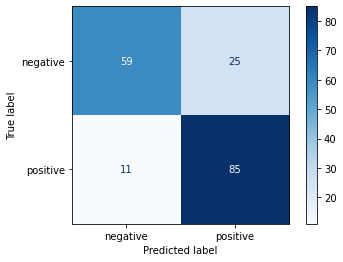

In [273]:
# 6
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(model, eval_X, eval_y, cmap=plt.cm.Blues)

In [282]:
f = lambda i: lambda x: i * x

a = []
for i in range(5):
    a.append(f(i))

print([f(3) for f in a])

[0, 3, 6, 9, 12]
